You can find the github repo for this assignment at https://github.com/gnourtwerdna/ece174miniproject.

# Problem 1

Given $\mathbf{A} \in C^{m \times n}, \mathbf{y}\in C^m$, show that $\hat{\mathbf{x}}$, solves $min_{\mathbf{x}\in C^m}||\mathbf{y}-\mathbf{A}\mathbf{x}||_2$ if it is a solution to the following system of equations:
$$ \mathbf{A}^T\mathbf{y}=\mathbf{A}^T\mathbf{A}\mathbf{x} $$

1.) The normal equations always have a solution. The above equations have the solution $\mathbf{x}=(\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{y}$, if $\mathbf{A}$ is full rank meaning $\mathbf{A}^T\mathbf{A}$ is invertible. If $\mathbf{A}$ is not full rank, then $\mathbf{A}^T\mathbf{A}$ is rank deficient. However, we can reach the solution for a rank deficient matrix via the pseudoinverse which I will talk about more in number 3.

2.) If $rank(A) = n$, then that means $N(A)={0}$, which means there's exactly one solution. If $rank(A)\lt n$,then the columns of $\mathbf{A}$ are linearly dependent and there's infinitely many solutions.

3.) If $rank(A)\lt N$, then that means the matrix is rank deficient. This means that $\mathbf{A}^T\mathbf{A}$ is not invertible and we won't be able to solve the above solution by traditional means. We have to take the pseudo-inverse of A, in order to solve the solution to the normal equation. Let $\mathbf{A}^\dagger=\mathbf{A}$, so our new solution to the normal equation is given by $\mathbf{x}=(\mathbf{A^\dagger}^T\mathbf{A^\dagger})^{-1}\mathbf{A^\dagger}^T\mathbf{y}$

# Problem 2: Least Squares Classifier

## Imports

In [1]:
import util
import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Processing

In [2]:
X_train, y_train = util.load_data('data/mnist.mat')
X_test, y_test = util.load_data('data/mnist.mat', train = False)
X_train = util.normalize(X_train)
X_test = util.normalize(X_test)
X_train = util.append_bias(X_train)
X_test = util.append_bias(X_test)

## Binary Classification

In [3]:
class1 = 9
class2 = 1
X_train_binary, y_train_binary = util.generate_binary_dataset(X_train, y_train, class1, class2)
X_test_binary, y_test_binary = util.generate_binary_dataset(X_test, y_test, class1, class2)
lr = LinearRegression.BinaryClassifier(class1, class2)
lr.fit(X_train_binary, y_train_binary)
y_pred_binary_train = lr.predict(X_train_binary)
y_pred_binary_test = lr.predict(X_test_binary)


In [4]:
train_error = util.error(y_train_binary, y_pred_binary_train)
test_error = util.error(y_test_binary, y_pred_binary_test)
train_error_rate = util.error_rate(y_train_binary, y_pred_binary_train)
test_error_rate = util.error_rate(y_test_binary, y_pred_binary_test)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 3266
Test Error: 528
Train Error Rate: 0.25734772673548184
Test Error Rate: 0.2462686567164179


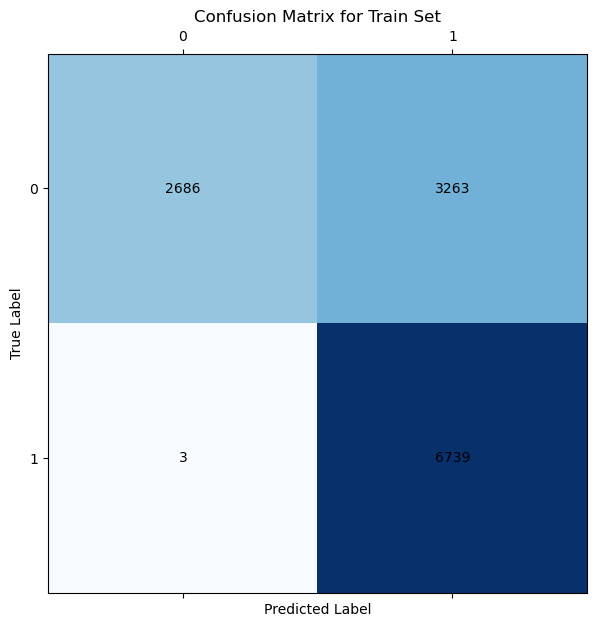

In [5]:
cm = util.confusion_matrix(y_train_binary, y_pred_binary_train, 2)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Train Set')

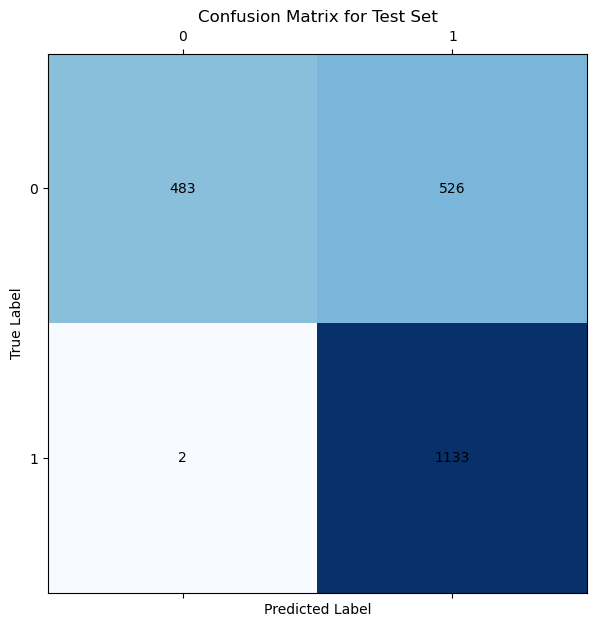

In [6]:
cm = util.confusion_matrix(y_test_binary, y_pred_binary_test, 2)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Test Set')

## One vs. All Multi-Class Classification

In [7]:
y_train_onehot = util.onehot_encode(y_train, 10)
lr = LinearRegression.OneVsAllClassifier()
lr.fit(X_train, y_train_onehot)
y_pred_ovr_train = lr.predict(X_train)
y_pred_ovr_test = lr.predict(X_test)

In [8]:
train_error = util.error(y_train, y_pred_ovr_train)
test_error = util.error(y_test, y_pred_ovr_test)
train_error_rate = util.error_rate(y_train, y_pred_ovr_train)
test_error_rate = util.error_rate(y_test, y_pred_ovr_test)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 8536
Test Error: 1397
Train Error Rate: 0.14226666666666668
Test Error Rate: 0.1397


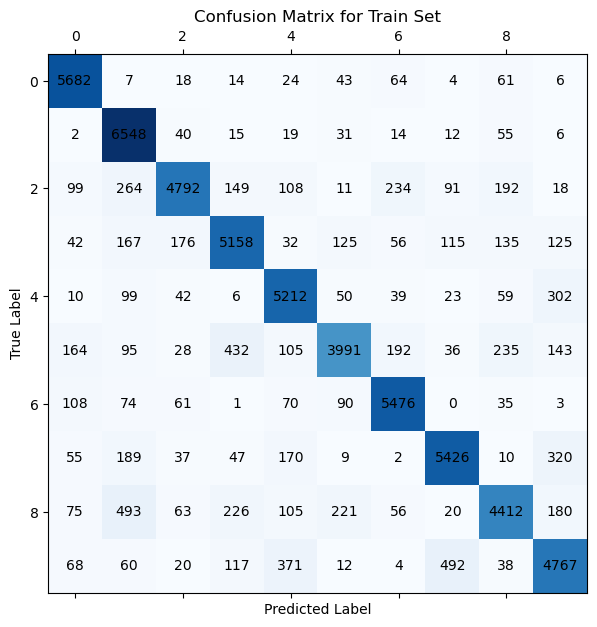

In [9]:
cm = util.confusion_matrix(y_train, y_pred_ovr_train, 10)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Train Set')

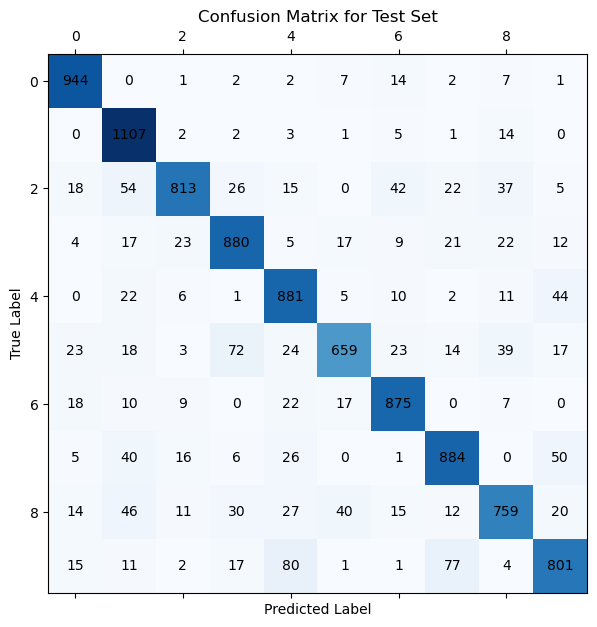

In [10]:
cm = util.confusion_matrix(y_test, y_pred_ovr_test, 10)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Test Set')

## One vs. One Multi-Class Classification

In [11]:
y_pred_ovo_train, y_pred_ovo_test = LinearRegression.OneVsOneClassifier(X_train, y_train, X_test, y_test)

In [12]:
train_error = util.error(y_train, y_pred_ovo_train)
test_error = util.error(y_test, y_pred_ovo_test)
train_error_rate = util.error_rate(y_train, y_pred_ovo_train)
test_error_rate = util.error_rate(y_test, y_pred_ovo_test)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 21044
Test Error: 3553
Train Error Rate: 0.35073333333333334
Test Error Rate: 0.3553


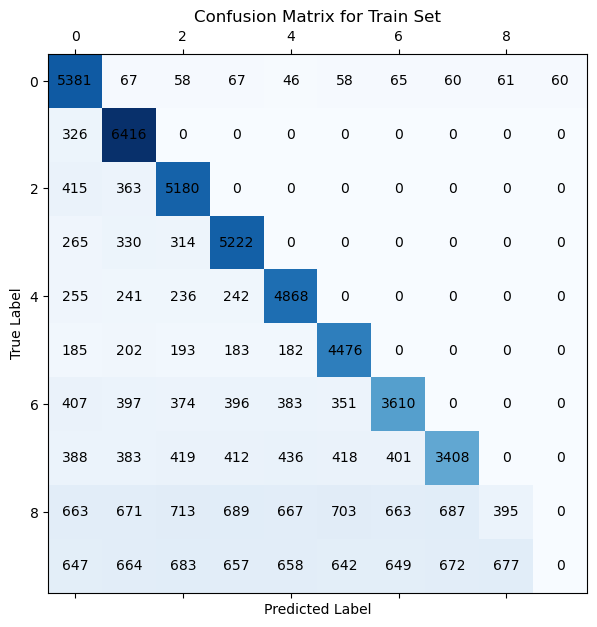

In [13]:
cm = util.confusion_matrix(y_train, y_pred_ovo_train, 10)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Train Set')

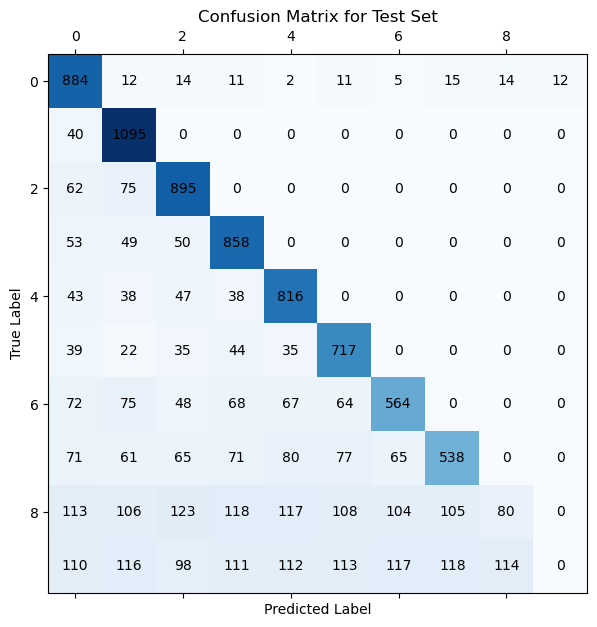

In [14]:
cm = util.confusion_matrix(y_test, y_pred_ovo_test, 10)
util.plot_confusion_matrix(cm, 'Confusion Matrix for Test Set')

## Evaluation on Multi-Class Classifiers

The one vs. all classifier is better at generalizing on the test data. For the test error rate was smaller than the train error rate for the one vs. all classifier. In contrast, the one vs. one classifier had a higher test error rate than train error rate. The number 2 was the easiest digit to recognize for both classifiers. The one vs. all classifier had trouble with the number 5, while the one vs. onne classifier had trouble with the number 9.

# Problem 3: Randomized Feature Based Least Square Classifiers

## Data Loading and Processing

In [15]:
X_train_map, y_train_map = util.load_data('data/mnist.mat')
X_test_map, y_test_map = util.load_data('data/mnist.mat', train = False)
X_train_map = util.normalize(X_train_map)
X_test_map = util.normalize(X_test_map)
X_train_map = util.append_bias(X_train_map, random = True)
X_test_map = util.append_bias(X_test_map, random = True)

# For 3.2 later
error_rates_identity_ova_train = []
error_rates_sigmoid_ova_train = []
error_rates_sinusoidal_ova_train = []
error_rates_relu_ova_train = []

error_rates_identity_ova_test = []
error_rates_sigmoid_ova_test = []
error_rates_sinusoidal_ova_test = []
error_rates_relu_ova_test = []

error_rates_identity_ovo_train = []
error_rates_sigmoid_ovo_train = []
error_rates_sinusoidal_ovo_train = []
error_rates_relu_ovo_train = []

error_rates_identity_ovo_test = []
error_rates_sigmoid_ovo_test = []
error_rates_sinusoidal_ovo_test = []
error_rates_relu_ovo_test = []

## Data Transformation

In [16]:
L = 1000
weights = np.random.random((L, 28 * 28 + 1))
X_train_map = np.dot(X_train_map, weights.T)
X_test_map = np.dot(X_test_map, weights.T)
y_train_map_onehot = util.onehot_encode(y_train_map, 10)

X_train_map_identity = util.identity(X_train_map)
X_train_map_sigmoid = util.sigmoid(X_train_map)
X_train_map_sinusoidal = util.sinusoidal(X_train_map)
X_train_map_ReLU = util.ReLU(X_train_map)

X_test_map_identity = util.identity(X_test_map)
X_test_map_sigmoid = util.sigmoid(X_test_map)
X_test_map_sinusoidal = util.sinusoidal(X_test_map)
X_test_map_ReLU = util.ReLU(X_test_map)

## One vs. All Multi-Class Classifier with Identity Function

In [17]:
lr = LinearRegression.OneVsAllClassifier()
lr.fit(X_train_map_identity, y_train_map_onehot)
y_pred_ovr_train_identity = lr.predict(X_train_map_identity)
y_pred_ovr_test_identity = lr.predict(X_test_map_identity)

In [18]:
train_error = util.error(y_train_map, y_pred_ovr_train_identity)
test_error = util.error(y_test_map, y_pred_ovr_test_identity)
train_error_rate = util.error_rate(y_train_map, y_pred_ovr_train_identity)
test_error_rate = util.error_rate(y_test_map, y_pred_ovr_test_identity)
error_rates_identity_ova_train.append(train_error_rate)
error_rates_identity_ova_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 8793
Test Error: 1462
Train Error Rate: 0.14655
Test Error Rate: 0.1462


## One vs. All Multi-Class Classifier with Sigmoid Function

In [19]:
lr = LinearRegression.OneVsAllClassifier()
lr.fit(X_train_map_identity, y_train_map_onehot)
y_pred_ovr_train_sigmoid = lr.predict(X_train_map_sigmoid)
y_pred_ovr_test_sigmoid = lr.predict(X_test_map_sigmoid)

In [20]:
train_error = util.error(y_train_map, y_pred_ovr_train_sigmoid)
test_error = util.error(y_test_map, y_pred_ovr_test_sigmoid)
train_error_rate = util.error_rate(y_train_map, y_pred_ovr_train_sigmoid)
test_error_rate = util.error_rate(y_test_map, y_pred_ovr_test_sigmoid)
error_rates_sigmoid_ova_train.append(train_error_rate)
error_rates_sigmoid_ova_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 53869
Test Error: 8990
Train Error Rate: 0.8978166666666667
Test Error Rate: 0.899


## One vs. All Multi-Class Classifier with Sinusoidal Function

In [21]:
lr = LinearRegression.OneVsAllClassifier()
lr.fit(X_train_map_identity, y_train_map_onehot)
y_pred_ovr_train_sinusoidal = lr.predict(X_train_map_sinusoidal)
y_pred_ovr_test_sinusoidal = lr.predict(X_test_map_sinusoidal)

In [22]:
train_error = util.error(y_train_map, y_pred_ovr_train_sinusoidal)
test_error = util.error(y_test_map, y_pred_ovr_test_sinusoidal)
train_error_rate = util.error_rate(y_train_map, y_pred_ovr_train_sinusoidal)
test_error_rate = util.error_rate(y_test_map, y_pred_ovr_test_sinusoidal)
error_rates_sinusoidal_ova_train.append(train_error_rate)
error_rates_sinusoidal_ova_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 53401
Test Error: 8953
Train Error Rate: 0.8900166666666667
Test Error Rate: 0.8953


## One vs. All Multi-Class Classifier with ReLU Function

In [23]:
lr = LinearRegression.OneVsAllClassifier()
lr.fit(X_train_map_identity, y_train_map_onehot)
y_pred_ovr_train_relu = lr.predict(X_train_map_ReLU)
y_pred_ovr_test_relu = lr.predict(X_test_map_ReLU)

In [24]:
train_error = util.error(y_train_map, y_pred_ovr_train_relu)
test_error = util.error(y_test_map, y_pred_ovr_test_relu)
train_error_rate = util.error_rate(y_train_map, y_pred_ovr_train_relu)
test_error_rate = util.error_rate(y_test_map, y_pred_ovr_test_relu)
error_rates_relu_ova_train.append(train_error_rate)
error_rates_relu_ova_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 8793
Test Error: 1462
Train Error Rate: 0.14655
Test Error Rate: 0.1462


## One vs. One Multi-Class Classifier with Identity Function

In [26]:
y_pred_ovo_train_identity, y_pred_ovo_test_identity = LinearRegression.OneVsOneClassifier(X_train_map_identity, y_train_map, X_test_map_identity, y_test_map)

In [27]:
train_error = util.error(y_train_map, y_pred_ovo_train_identity)
test_error = util.error(y_test_map, y_pred_ovo_test_identity)
train_error_rate = util.error_rate(y_train_map, y_pred_ovo_train_identity)
test_error_rate = util.error_rate(y_test_map, y_pred_ovo_test_identity)
error_rates_identity_ovo_train.append(train_error_rate)
error_rates_identity_ovo_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 21610
Test Error: 3570
Train Error Rate: 0.3601666666666667
Test Error Rate: 0.357


## One vs. One Multi-Class Classifier with Sigmoid Function

In [28]:
y_pred_ovo_train_sigmoid, y_pred_ovo_test_sigmoid = LinearRegression.OneVsOneClassifier(X_train_map_sigmoid, y_train_map, X_test_map_sigmoid, y_test_map)

In [29]:
train_error = util.error(y_train_map, y_pred_ovo_train_sigmoid)
test_error = util.error(y_test_map, y_pred_ovo_test_sigmoid)
train_error_rate = util.error_rate(y_train_map, y_pred_ovo_train_sigmoid)
test_error_rate = util.error_rate(y_test_map, y_pred_ovo_test_sigmoid)
error_rates_sigmoid_ovo_train.append(train_error_rate)
error_rates_sigmoid_ovo_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 12622
Test Error: 2066
Train Error Rate: 0.21036666666666667
Test Error Rate: 0.2066


## One vs. One Multi-Class Classifier with Sinusoidal Function

In [30]:
y_pred_ovo_train_sinusoidal, y_pred_ovo_test_sinusoidal = LinearRegression.OneVsOneClassifier(X_train_map_sinusoidal, y_train_map, X_test_map_sinusoidal, y_test_map)

In [31]:
train_error = util.error(y_train_map, y_pred_ovo_train_sinusoidal)
test_error = util.error(y_test_map, y_pred_ovo_test_sinusoidal)
train_error_rate = util.error_rate(y_train_map, y_pred_ovo_train_sinusoidal)
test_error_rate = util.error_rate(y_test_map, y_pred_ovo_test_sinusoidal)
error_rates_sinusoidal_ovo_train.append(train_error_rate)
error_rates_sinusoidal_ovo_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 18890
Test Error: 2825
Train Error Rate: 0.31483333333333335
Test Error Rate: 0.2825


## One vs. One Multi-Class Classifier with ReLU Function

In [32]:
y_pred_ovo_train_relu, y_pred_ovo_test_relu = LinearRegression.OneVsOneClassifier(X_train_map_ReLU, y_train_map, X_test_map_ReLU, y_test_map)

In [33]:
train_error = util.error(y_train_map, y_pred_ovo_train_relu)
test_error = util.error(y_test_map, y_pred_ovo_test_relu)
train_error_rate = util.error_rate(y_train_map, y_pred_ovo_train_relu)
test_error_rate = util.error_rate(y_test_map, y_pred_ovo_test_relu)
error_rates_relu_ovo_train.append(train_error_rate)
error_rates_relu_ovo_test.append(test_error_rate)
print('Train Error: {}'.format(train_error))
print('Test Error: {}'.format(test_error))
print('Train Error Rate: {}'.format(train_error_rate))
print('Test Error Rate: {}'.format(test_error_rate))

Train Error: 21614
Test Error: 3599
Train Error Rate: 0.36023333333333335
Test Error Rate: 0.3599


## Discussion on Feature Mapping

We can notice that the one vs all classifier performs worse with sigmoid and sinusoidal feature mapping, hovering around a 0.9 error rate for both. On the other hand, the one vs all classifier with identity and ReLU feature mapping performs very similar to how it did before the feature mapping. The one vs one classifier generalized better after feature mapping in general, having a lower test error rate than the train error rate for all mapping functions. The sigmoid function and sinusoidal function did particularly well for the one vs one classifier, doing better than the classifier learnt on the untransformed data. The identity and ReLU function for the one vs one classifier had similar results to the classifier for the untransformed data. Overall, we can see that the sigmoid function and sinusoidal function improve one vs one classifiers and worsen one vs all classifiers.

## Varying Number of Features

In [34]:
X_train_new, y_train_new = util.load_data('data/mnist.mat')
X_test_new, y_test_new = util.load_data('data/mnist.mat', train = False)
X_train_new = util.normalize(X_train_new)
X_test_new = util.normalize(X_test_new)
X_train_new = util.append_bias(X_train_new, random = True)
X_test_new = util.append_bias(X_test_new, random = True)
y_train_new_onehot = util.onehot_encode(y_train_map, 10)

In [35]:
L = 2000
lr = LinearRegression.OneVsAllClassifier()

weights = np.random.random((L, 28 * 28 + 1))
X_train = np.dot(X_train_new, weights.T)
X_test = np.dot(X_test_new, weights.T)

X_train_new_identity = util.identity(X_train)
X_test_new_identity = util.identity(X_test)

X_train_new_sigmoid = util.sigmoid(X_train)
X_test_new_sigmoid = util.sigmoid(X_test)

X_train_new_sinusoidal = util.sinusoidal(X_train)
X_test_new_sinusoidal = util.sinusoidal(X_test)

X_train_new_ReLU = util.ReLU(X_train)
X_test_new_ReLU = util.ReLU(X_test)

# Identity OVA
lr.fit(X_train_new_identity, y_train_map_onehot)
y_pred_train_identity = lr.predict(X_train_new_identity)
y_pred_test_identity = lr.predict(X_test_new_identity)
train_error_rate = util.error_rate(y_train_new, y_pred_train_identity)
test_error_rate = util.error_rate(y_train_new, y_pred_test_identity)
error_rates_identity_ova_train.append(train_error_rate)
error_rates_identity_ova_test.append(test_error_rate)

# Sigmoid OVA
lr.fit(X_train_new_sigmoid, y_train_map_onehot)
y_pred_train_sigmoid = lr.predict(X_train_new_sigmoid)
y_pred_test_sigmoid = lr.predict(X_test_new_sigmoid)
error_rates_sigmoid_ova_train.append(y_pred_train_sigmoid)
error_rates_sigmoid_ova_test.append(y_pred_test_sigmoid)
train_error_rate = util.error_rate(y_train_new, y_pred_train_sigmoid)
test_error_rate = util.error_rate(y_train_new, y_pred_test_sigmoid)
error_rates_sigmoid_ova_train.append(train_error_rate)
error_rates_sigmoid_ova_test.append(test_error_rate)

# Sinusoidal OVA
lr.fit(X_train_new_sinusoidal, y_train_map_onehot)
y_pred_train_sinusoidal = lr.predict(X_train_new_sinusoidal)
y_pred_test_sinusoidal = lr.predict(X_test_new_sinusoidal)
train_error_rate = util.error_rate(y_train_new, y_pred_train_sinusoidal)
test_error_rate = util.error_rate(y_train_new, y_pred_test_sinusoidal)
error_rates_sinusoidal_ova_train.append(train_error_rate)
error_rates_sinusoidal_ova_test.append(test_error_rate)

# ReLU OVA
lr.fit(X_train_new_ReLU, y_train_map_onehot)
y_pred_train_ReLU = lr.predict(X_train_new_ReLU)
y_pred_test_ReLU = lr.predict(X_test_new_ReLU)
train_error_rate = util.error_rate(y_train_new, y_pred_train_ReLU)
test_error_rate = util.error_rate(y_train_new, y_pred_test_ReLU)
error_rates_relu_ova_train.append(train_error_rate)
error_rates_relu_ova_test.append(test_error_rate)

    

In [36]:
# Identity OVO
y_pred_train_identity, y_pred_test_identity = LinearRegression.OneVsOneClassifier(X_train_new_identity, y_train_new, X_test_new_identity, y_test_new)
train_error_rate = util.error_rate(y_train_new, y_pred_train_identity)
test_error_rate = util.error_rate(y_train_new, y_pred_test_identity)
error_rates_identity_ovo_train.append(train_error_rate)
error_rates_identity_ovo_test.append(test_error_rate)

# Sigmoid OVO
y_pred_train_sigmoid, y_pred_test_sigmoid = LinearRegression.OneVsOneClassifier(X_train_new_sigmoid, y_train_new, X_test_new_sigmoid, y_test_new)
train_error_rate = util.error_rate(y_train_new, y_pred_train_sigmoid)
test_error_rate = util.error_rate(y_train_new, y_pred_test_sigmoid)
error_rates_sigmoid_ovo_train.append(train_error_rate)
error_rates_sigmoid_ovo_test.append(test_error_rate)

# Sinusoidal OVO
y_pred_train_sinusoidal, y_pred_test_sinusoidal = LinearRegression.OneVsOneClassifier(X_train_new_sinusoidal, y_train_new, X_test_new_sinusoidal, y_test_new)
train_error_rate = util.error_rate(y_train_new, y_pred_train_sinusoidal)
test_error_rate = util.error_rate(y_train_new, y_pred_test_sinusoidal)
error_rates_sinusoidal_ovo_train.append(train_error_rate)
error_rates_sinusoidal_ovo_test.append(test_error_rate)

# ReLU OVO
y_pred_train_relu, y_pred_test_relu = LinearRegression.OneVsOneClassifier(X_train_new_ReLU, y_train_new, X_test_new_ReLU, y_test_new)
train_error_rate = util.error_rate(y_train_new, y_pred_train_relu)
test_error_rate = util.error_rate(y_train_new, y_pred_test_relu)
error_rates_relu_ovo_train.append(train_error_rate)
error_rates_relu_ovo_test.append(test_error_rate)

In [37]:
features = [1000, 2000]

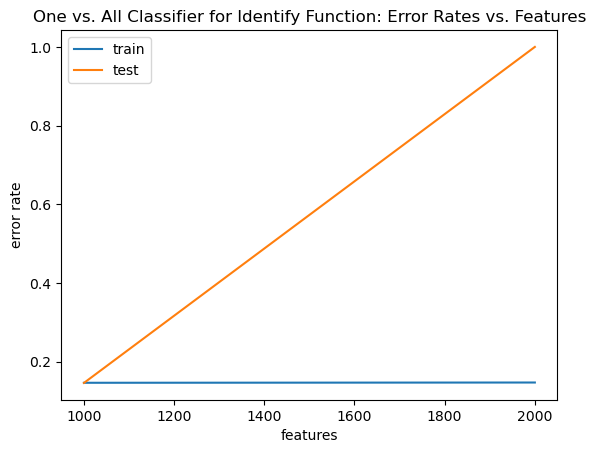

In [43]:
plt.plot(features, error_rates_identity_ova_train, label = 'train')
plt.plot(features, error_rates_identity_ova_test, label = 'test')
plt.title('One vs. All Classifier for Identify Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

/home/andrew/anaconda3/envs/nnets/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)

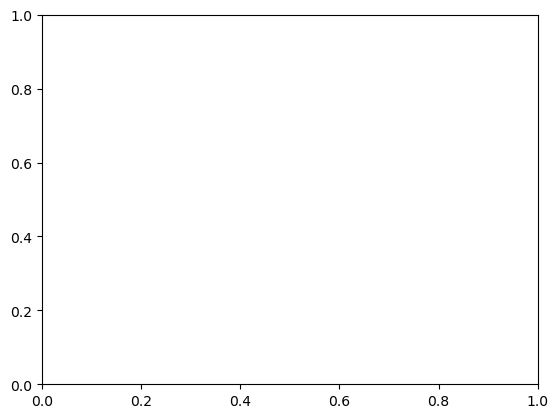

In [44]:
plt.plot(features, error_rates_sigmoid_ova_train, label = 'train')
plt.plot(features, error_rates_sigmoid_ova_test, label = 'test')
plt.title('One vs. All Classifier for Identify Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

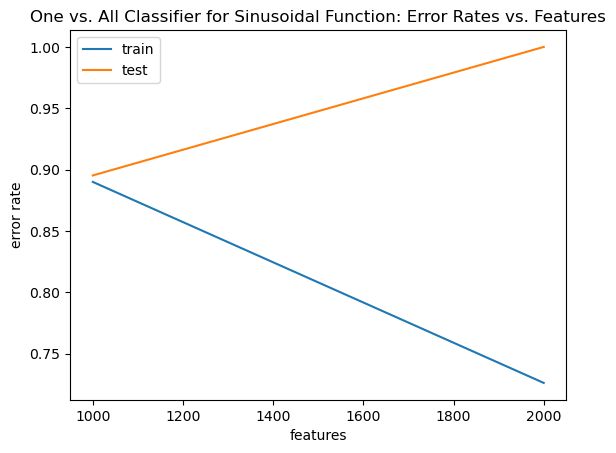

In [46]:
plt.plot(features, error_rates_sinusoidal_ova_train, label = 'train')
plt.plot(features, error_rates_sinusoidal_ova_test, label = 'test')
plt.title('One vs. All Classifier for Sinusoidal Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

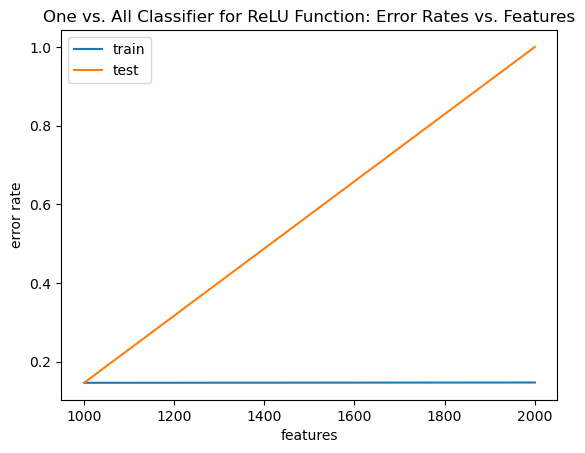

In [47]:
plt.plot(features, error_rates_relu_ova_train, label = 'train')
plt.plot(features, error_rates_relu_ova_test, label = 'test')
plt.title('One vs. All Classifier for ReLU Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

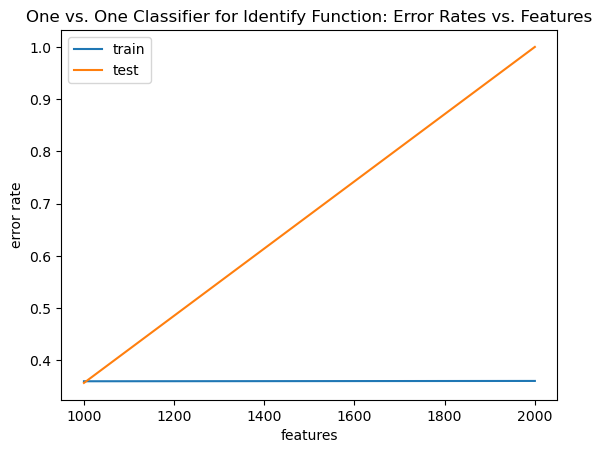

In [48]:
plt.plot(features, error_rates_identity_ovo_train, label = 'train')
plt.plot(features, error_rates_identity_ovo_test, label = 'test')
plt.title('One vs. One Classifier for Identify Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

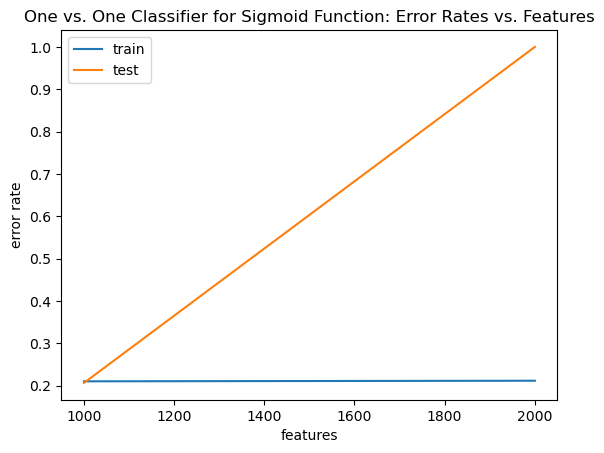

In [51]:
plt.plot(features, error_rates_sigmoid_ovo_train, label = 'train')
plt.plot(features, error_rates_sigmoid_ovo_test, label = 'test')
plt.title('One vs. One Classifier for Sigmoid Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

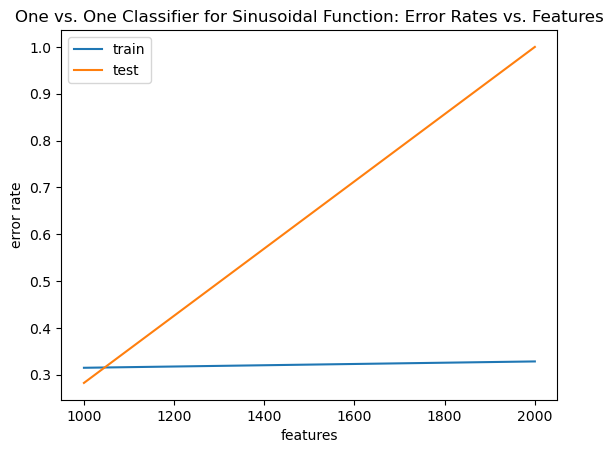

In [52]:
plt.plot(features, error_rates_sinusoidal_ovo_train, label = 'train')
plt.plot(features, error_rates_sinusoidal_ovo_test, label = 'test')
plt.title('One vs. One Classifier for Sinusoidal Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

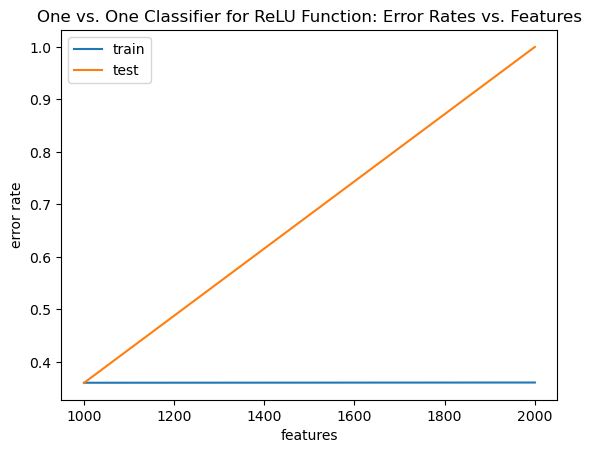

In [53]:
plt.plot(features, error_rates_relu_ovo_train, label = 'train')
plt.plot(features, error_rates_relu_ovo_test, label = 'test')
plt.title('One vs. One Classifier for ReLU Function: Error Rates vs. Features')
plt.legend()
plt.xlabel('features')
plt.ylabel('error rate')
plt.show()

Due to computational limits, I was unable to run for 2000 features without my kernel crashing. We can see that the test error rate increases with an increase in the number of features. This makes sense because the classifier is now overfitting on the training set which makes it generalize worse.